# Naive Approach to ARIMA modelling using MSE values as loss function

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from datetime import datetime, timedelta
from itertools import product
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

register_matplotlib_converters()

In [5]:
train_df = pd.read_csv("../data/train.csv")
train_df["date"] = pd.to_datetime(train_df["date"])
train_df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


# INCOMPLETE, I don't know how to do out of sample forecasting with ARIMA.
# ARIMA works fine with in-sample "forecasting"
# All the sources I have looked up on the internal only do forecasting of size

In [99]:

## In complete
def find_best_model(df, store_id, item_id):
    df2 = df[(df["store"] == store_id) & (df["item"] == item_id)][["date", "sales"]]
    df_size = len(df2)
    # from the ratio there is around 5 "period" so train set is 4 period
    train_ratio = 0.6
    train_cutoff_index = int(df_size * train_ratio)

    # We need to preserve the temporal order of the train and val df
    train_df = df2[:train_cutoff_index]
    val_df = df2[train_cutoff_index:]
    
    train_series = pd.Series(train_df["sales"].values, train_df["date"])
    val_series = pd.Series(val_df["sales"].values, val_df["date"])

    best_model = None
    best_loss = np.inf  ## MSE loss
    step_size = 10

    model = ARIMA(train_series, order=(3,1,3)).fit()
    
    # pred = model.get_predict(start=train_series.index[0], end=val_series.index[-1], dynamic=False)
    pred = model.forecast(steps=len(val_series))
    plt.plot(train_series)
    plt.plot(pred)
    
    # plt.plot(pred)
    # plt.plot(train_series)
    
    # for (p, q) in product(range(2), range(2)):
    # # for (p, q) in product(range(2+1), range(7+1)):
    #     if p + q == 0:
    #         continue
    #     model = ARIMA(train_series, order=(p,1,q)).fit()
    #     pred = model.predict(start=val_series.index[0], end=val_series.index[-1])

    #     plt.plot(pred)

/media/windows/Users/min/My_Documents/School/Year3Semester1/SC4000/Demand_Forecast/_build/pip_packages/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/media/windows/Users/min/My_Documents/School/Year3Semester1/SC4000/Demand_Forecast/_build/pip_packages/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/media/windows/Users/min/My_Documents/School/Year3Semester1/SC4000/Demand_Forecast/_build/pip_packages/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/media/windows/Users/min/My_Documents/School/Year3Semester1/SC4000/Demand_Forecast/_build/pip_packages/lib/python3.10/

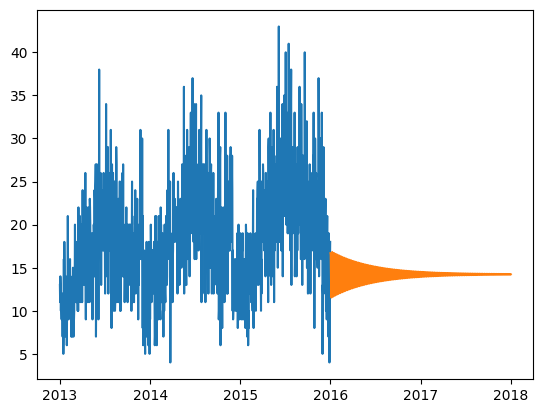

In [98]:
find_best_model(train_df, 1, 1)